In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# Install the Kaggle API client
!pip install -q kaggle

# Upload the kaggle.json file
from google.colab import files
files.upload()

# Set up the directory and file permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download a sample dataset (for example, the Titanic dataset)
!kaggle competitions download -c titanic

# Unzip the dataset
!unzip titanic.zip

Saving titanic.zip to titanic.zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Archive:  titanic.zip
  inflating: Titanic-Dataset.csv     


In [4]:
# Download the Iris dataset
!kaggle datasets download -d uciml/iris

# Unzip the dataset
!unzip iris.zip

# Load the dataset using pandas
import pandas as pd

data = pd.read_csv('Iris.csv')


Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 3.24MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop the Id column
data = data.drop('Id', axis=1)

# Convert species names to integers
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

# Splitting the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separating the features and labels
X_train = train_data.drop('Species', axis=1)
y_train = train_data['Species']
X_test = test_data.drop('Species', axis=1)
y_test = test_data['Species']


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Input shape = 4 features
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for the 3 species of iris
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=10
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8923 - loss: 0.3680 - val_accuracy: 0.9000 - val_loss: 0.3522
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9365 - loss: 0.3791 - val_accuracy: 0.9333 - val_loss: 0.3501
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.3681 - val_accuracy: 0.9333 - val_loss: 0.3426
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3573 - val_accuracy: 0.9333 - val_loss: 0.3362
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9536 - loss: 0.3484 - val_accuracy: 0.9667 - val_loss: 0.3292
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9167 - loss: 0.3698 - val_accuracy: 0.9667 - val_loss: 0.3231
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9355 - loss: 0.3445 - val_accuracy: 0.9667 - val_loss: 0.3172
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9503 - loss: 0.3162 - val_accuracy: 0.9667 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


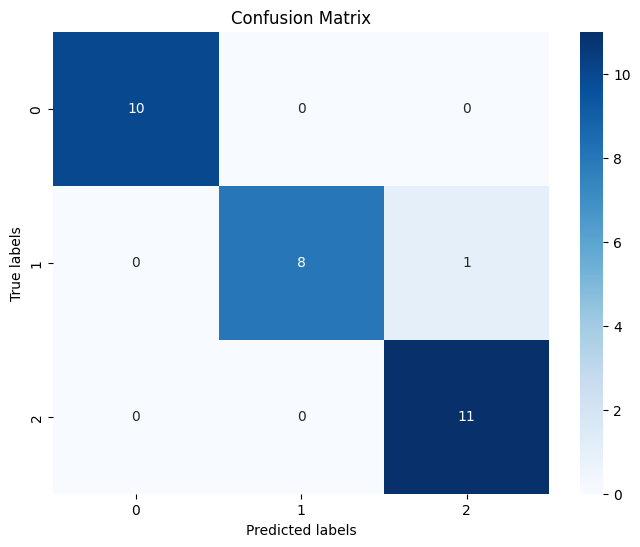

Sample 82 - True Label: Iris-versicolor, Predicted Label: Iris-versicolor
--------------------------------------------------
Sample 73 - True Label: Iris-versicolor, Predicted Label: Iris-virginica
--------------------------------------------------
Sample 19 - True Label: Iris-setosa, Predicted Label: Iris-versicolor
--------------------------------------------------
Sample 141 - True Label: Iris-virginica, Predicted Label: Iris-versicolor
--------------------------------------------------
Sample 118 - True Label: Iris-virginica, Predicted Label: Iris-versicolor
--------------------------------------------------
Sample 78 - True Label: Iris-versicolor, Predicted Label: Iris-virginica
--------------------------------------------------
Sample 29 - True Label: Iris-setosa, Predicted Label: Iris-versicolor
--------------------------------------------------
Sample 76 - True Label: Iris-versicolor, Predicted Label: Iris-setosa
--------------------------------------------------
Sample 36 - Tr

In [13]:
# Generate predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display a few predicted examples
num_samples = 10
sample_indices = np.random.choice(X_test.index, size=num_samples, replace=False)
sample_predictions = [predicted_classes[i] for i in range(len(y_test)) if y_test.index[i] in sample_indices]

for idx, pred in zip(sample_indices, sample_predictions):
    print(f"Sample {idx} - True Label: {le.inverse_transform([y_test[idx]])[0]}, Predicted Label: {le.inverse_transform([pred])[0]}")
    print("-"*50)
